 读取csv数据文件，查看前10行数据

In [43]:
import pandas as pd
pumpkins= pd.read_csv("../data/US-pumpkins.csv")
pumpkins.head(10)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
5,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/12/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
6,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,170.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
7,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
8,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,10/1/16,160.0,170.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
9,BALTIMORE,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,10/1/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [44]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

删除空值较少列的行

In [45]:
pumpkins = pumpkins.dropna(subset=['Variety', 'Origin'])
pumpkins.isnull().sum()

City Name             0
Type               1704
Package               0
Variety               0
Sub Variety        1453
Grade              1749
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                0
Origin District    1618
Item Size           279
Color               608
Environment        1749
Unit of Sale       1587
Quality            1749
Condition          1749
Appearance         1749
Storage            1749
Crop               1749
Repack                0
Trans Mode         1749
Unnamed: 24        1749
Unnamed: 25        1646
dtype: int64

In [46]:

pumpkins= pumpkins.dropna(axis=1)
pumpkins.head(10)

,City Name,Package,Variety,Date,Low Price,High Price,Origin,Repack
2,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.0,160.0,DELAWARE,N
3,BALTIMORE,24 inch bins,HOWDEN TYPE,9/24/16,160.0,160.0,VIRGINIA,N
4,BALTIMORE,24 inch bins,HOWDEN TYPE,11/5/16,90.0,100.0,MARYLAND,N
5,BALTIMORE,24 inch bins,HOWDEN TYPE,11/12/16,90.0,100.0,MARYLAND,N
6,BALTIMORE,36 inch bins,HOWDEN TYPE,9/24/16,160.0,170.0,MARYLAND,N
7,BALTIMORE,36 inch bins,HOWDEN TYPE,9/24/16,160.0,160.0,PENNSYLVANIA,N
8,BALTIMORE,36 inch bins,HOWDEN TYPE,10/1/16,160.0,170.0,MARYLAND,N
9,BALTIMORE,36 inch bins,HOWDEN TYPE,10/1/16,160.0,160.0,PENNSYLVANIA,N
10,BALTIMORE,36 inch bins,HOWDEN TYPE,10/8/16,160.0,170.0,MARYLAND,N
11,BALTIMORE,36 inch bins,HOWDEN TYPE,10/8/16,160.0,160.0,PENNSYLVANIA,N


价格与打包规格有关，但数据中规格五花八门，这里先选择 bushel 的数据

In [47]:
pumpkins["Package"].drop_duplicates() #去重
pumpkins["Package"].value_counts() #个数

Package
36 inch bins            663
24 inch bins            543
1/2 bushel cartons      234
1 1/9 bushel cartons    117
35 lb cartons            42
bushel cartons           37
40 lb cartons            19
each                     17
1 1/9 bushel crates      17
bins                     13
50 lb sacks              11
bushel baskets           10
50 lb cartons            10
22 lb cartons            10
20 lb cartons             6
Name: count, dtype: int64

In [48]:
bushel_pks = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
bushel_pks.head(10)

,City Name,Package,Variety,Date,Low Price,High Price,Origin,Repack
70,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,15.0,15.0,DELAWARE,N
71,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,18.0,18.0,DELAWARE,N
72,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,18.0,18.0,DELAWARE,N
73,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,17.0,17.0,OHIO,N
74,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/8/16,15.0,15.0,DELAWARE,N
75,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/8/16,18.0,18.0,DELAWARE,N
76,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/8/16,17.0,17.0,OHIO,N
77,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/8/16,17.0,18.5,PENNSYLVANIA,N
78,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/15/16,15.0,15.0,DELAWARE,N
79,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/15/16,17.0,17.0,OHIO,N



loc是Pandas库中的一个方法，用于基于标签（label）进行数据索引和选择。它允许您按照行和列的标签来访问和操作数据。
dataframe.loc[row_label, column_label]

In [49]:
bushel_pks.loc[bushel_pks["Package"].str.contains('1 1/9'),'Price']=(bushel_pks["Low Price"]+bushel_pks["High Price"])/2/(1+1/9)
# bushel_pks.loc[ bushel_pks["Package"].str.contains('1/2')].head()   条件查询符合条件的行
bushel_pks.loc[bushel_pks["Package"].str.contains('1/2'),'Price']=(bushel_pks["Low Price"]+bushel_pks["High Price"])/2/(1/2)

/tmp/ipykernel_528/1639005077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bushel_pks.loc[bushel_pks["Package"].str.contains('1 1/9'),'Price']=(bushel_pks["Low Price"]+bushel_pks["High Price"])/2/(1+1/9)


In [50]:
ps_2=bushel_pks.loc[ bushel_pks["Package"].str.contains('1/2')].head()
ps_9=bushel_pks.loc[ bushel_pks["Package"].str.contains('1 1/9')].head()

pd.concat([ps_2,ps_9])

,City Name,Package,Variety,Date,Low Price,High Price,Origin,Repack,Price
123,BALTIMORE,1/2 bushel cartons,MINIATURE,9/24/16,18.0,18.0,MARYLAND,N,36.0
124,BALTIMORE,1/2 bushel cartons,MINIATURE,9/24/16,15.0,15.0,MARYLAND,N,30.0
125,BALTIMORE,1/2 bushel cartons,MINIATURE,10/1/16,18.0,18.0,MARYLAND,N,36.0
126,BALTIMORE,1/2 bushel cartons,MINIATURE,10/1/16,15.0,15.0,MARYLAND,N,30.0
127,BALTIMORE,1/2 bushel cartons,MINIATURE,10/1/16,17.0,17.0,OHIO,N,34.0
70,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,15.0,15.0,DELAWARE,N,13.5
71,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,9/24/16,18.0,18.0,DELAWARE,N,16.2
72,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,18.0,18.0,DELAWARE,N,16.2
73,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/1/16,17.0,17.0,OHIO,N,15.3
74,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,10/8/16,15.0,15.0,DELAWARE,N,13.5


In [51]:
month = pd.DatetimeIndex(bushel_pks['Date']).month

new_pks=pd.DataFrame({'Month':month,'Package':bushel_pks["Package"],'City':bushel_pks["City Name"],'Price':bushel_pks["Price"]})

new_pks

,Month,Package,City,Price
70,9,1 1/9 bushel cartons,BALTIMORE,13.50
71,9,1 1/9 bushel cartons,BALTIMORE,16.20
72,10,1 1/9 bushel cartons,BALTIMORE,16.20
73,10,1 1/9 bushel cartons,BALTIMORE,15.30
74,10,1 1/9 bushel cartons,BALTIMORE,13.50
...,...,...,...,...
1738,9,1/2 bushel cartons,ST. LOUIS,30.00
1739,9,1/2 bushel cartons,ST. LOUIS,28.75
1740,9,1/2 bushel cartons,ST. LOUIS,25.75
1741,9,1/2 bushel cartons,ST. LOUIS,24.00


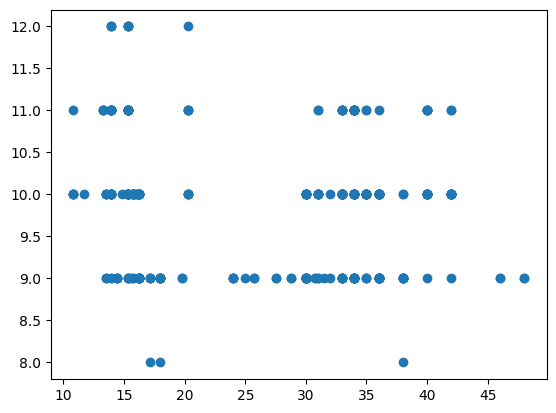

In [52]:
import matplotlib.pyplot as plt

price = new_pks.Price
month = new_pks.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

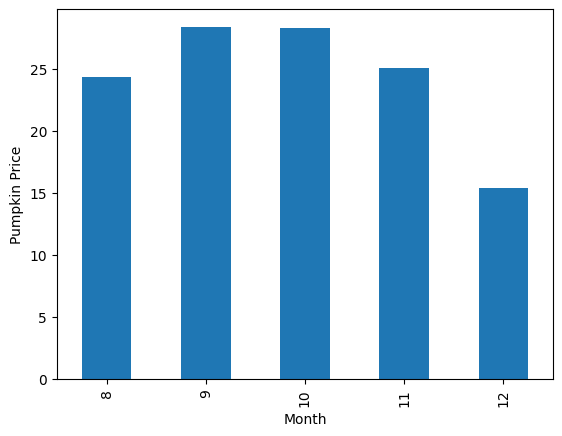

In [53]:
new_pks.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")